In [11]:
from sympy import symbols, Matrix, Abs, Max
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.colors as mcolors
from itertools import product
from scipy.spatial.distance import cdist
# %matplotlib widget

The below code is to check spectral radius of Jacobian of GEG for the case that objective function is $f(x,y)=xy$

In [2]:

gamma, eta, tau = sp.symbols('gamma eta tau')
I = sp.eye(2) 
J = sp.Matrix([[0, 1], [-1, 0]])

# Define the matrices
term1 = sp.Matrix([[gamma * eta / tau, 0], [0, gamma * eta]])
term2 = sp.Matrix([[eta / tau, 0], [0, eta]])

# Compute A
A = I - term1 @ J @ (I - term2 @ J)
print(A)

Matrix([[-eta**2*gamma/tau + 1, -eta*gamma/tau], [eta*gamma, -eta**2*gamma/tau + 1]])


In [118]:

def compute_sr(gamma, eta, tau):
    I = np.eye(2)
    J = np.array([[0, 1], [-1, 0]])
    A = I - np.array([[gamma * eta / tau, 0], [0, gamma * eta]])@J@(I - np.array([[eta / tau, 0], [0, eta]])@J)
    eigenvalues = np.linalg.eigvals(A)
    return max(abs(eigenvalues))

compute_sr(0.1, 0.9, 1)

0.9233964479030662

The below code is related to second numerical example. At first we just check the norm of the gradient at the critical points given by Mathematica code just be ensured. Then, we check stability and spectral radius of these critical points and check wether they are local Nash equilibriums or not.

In [3]:
def nabx(x, y):
    return (x**2 * y**2 * (1.0 * x + 4 * y) +
            2 * x * y**2 * (0.5 * x**2 + 4 * x * y + 0.5 * y**2) +
            (-0.25 * x + 0.6 * y) * (x - 1)**2 * (y - 1)**2 +
            (2 * x - 2) * (y - 1)**2 * (-0.125 * x**2 + 0.6 * x * y - 0.5 * y**2))

def naby(x, y):
    return (x**2 * y**2 * (4 * x + 1.0 * y) +
            2 * x**2 * y * (0.5 * x**2 + 4 * x * y + 0.5 * y**2) +
            (0.6 * x - 1.0 * y) * (x - 1)**2 * (y - 1)**2 +
            (x - 1)**2 * (2 * y - 2) * (-0.125 * x**2 + 0.6 * x * y - 0.5 * y**2))

# Given solutions from Mathematica
solutions = [
    (-4.73419, 0.559857),
    (-0.0849318, 1.00552),
    (0, 0),
    (0, 1),
    (1, 0),
    (0.730749, -5.39852),
    (1.01738, -0.0856417),
    (38.4017, -1.48689),
]

# Check the values of nabx and naby at each solution
for x, y in solutions:
    nabx_val = nabx(x, y)
    naby_val = naby(x, y)
    print(f"At (x, y) = ({x}, {y}): nabx = {nabx_val:.2e}, naby = {naby_val:.2e}")

At (x, y) = (-4.73419, 0.559857): nabx = -4.09e-05, naby = -2.08e-05
At (x, y) = (-0.0849318, 1.00552): nabx = 3.63e-08, naby = 1.34e-06
At (x, y) = (0, 0): nabx = 0.00e+00, naby = 0.00e+00
At (x, y) = (0, 1): nabx = 0.00e+00, naby = 0.00e+00
At (x, y) = (1, 0): nabx = 0.00e+00, naby = 0.00e+00
At (x, y) = (0.730749, -5.39852): nabx = 1.85e-03, naby = -7.77e-05
At (x, y) = (1.01738, -0.0856417): nabx = -1.52e-06, naby = -2.15e-07
At (x, y) = (38.4017, -1.48689): nabx = -4.34e-02, naby = -4.11e+00


In [4]:
x, y = sp.symbols('x y')


f1 = -0.125*x**2 - 0.5*y**2 + 0.6*x*y
f2 = 0.5*x**2 + 0.5*y**2 + 4*x*y

f = f1 * (x-1)**2 * (y-1)**2 + f2 * x**2 * y**2

grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)


In [11]:
x_val = np.array([0,0,1,-4.73419,-0.0849318,0.730749,1.01738,38.4017])
y_val = np.array([0,1,0,0.559857,1.00552,-5.39852,-0.0856417,-1.48689])


eta = 0.001
gamma = 0.5
tau = 1
J = sp.Matrix([[grad_x, grad_y]]).jacobian([x, y])
def spectral_radius_J(x_val, y_val, eta, gamma,tau):
    # Substitute x, y values into Hessian
    H_val = sp.Matrix([[-1/tau, 0], [0, 1]]) * J.subs({x: x_val, y: y_val})
    
    dim = 2  
    I = sp.eye(dim)
    J_matrix = I + gamma*eta*H_val@(I+eta*H_val)
    
    eigenvalues = J_matrix.eigenvals()
    
    spectral_radius = max(abs(ev) for ev in eigenvalues.keys())
    
    return spectral_radius

def spectral_radius_J2(x_val, y_val, eta,tau):
    H_val = sp.Matrix([[-1/tau, 0], [0, 1]]) * J.subs({x: x_val, y: y_val})
    
    dim = 2  
    I = sp.eye(dim)
    J_matrix = I + eta*H_val
    
    eigenvalues = J_matrix.eigenvals()
    
    spectral_radius = max(abs(ev) for ev in eigenvalues.keys())
    
    return spectral_radius

for i in range(len(x_val)):
    print("x,y=",x_val[i], y_val[i])
    print('GTTEG spectral radius',spectral_radius_J(x_val[i], y_val[i], eta, gamma,tau))
    print('tau-GDA spectral radius',spectral_radius_J2(x_val[i], y_val[i], eta, tau))
    print(J.subs({x: x_val[i], y: y_val[i]})[0],J.subs({x: x_val[i], y: y_val[i]})[3])

x,y= 0.0 0.0
GTTEG spectral radius 0.999900020000000
tau-GDA spectral radius 0.999800000000000
-0.250000000000000 -1.00000000000000
x,y= 0.0 1.0
GTTEG spectral radius 0.999500500000000
tau-GDA spectral radius 0.999000000000000
1.00000000000000 -1.00000000000000
x,y= 1.0 0.0
GTTEG spectral radius 1.00050050000000
tau-GDA spectral radius 1.00100000000000
-0.250000000000000 1.00000000000000
x,y= -4.73419 0.559857
GTTEG spectral radius 0.992764339038539
tau-GDA spectral radius 0.983243644773247
12.2034010275095 -989.865923402703
x,y= -0.0849318 1.00552
GTTEG spectral radius 1.00050283178594
tau-GDA spectral radius 1.00100465424174
-1.00640760894086 -1.31132491653929
x,y= 0.730749 -5.39852
GTTEG spectral radius 7.18182443085604
tau-GDA spectral radius 4.05156991508151
-3058.90758289834 26.8393702601135
x,y= 1.01738 -0.0856417
GTTEG spectral radius 1.00021521104191
tau-GDA spectral radius 1.00043023697996
-0.431735367883251 -1.04892035970580
x,y= 38.4017 -1.48689
GTTEG spectral radius 310270

The below code is to check trajectories of the iterates of GEG using second numerical example objective function for random initial values. The plot is not included in the submitted paper.

In [2]:
def f(x, y):
    f1 = -0.125*x**2 - 0.5*y**2 + 0.6*x*y
    f2 = 0.5*x**2 + 0.5*y**2 + 4*x*y
    f   = f1 * (x-1)**2 * (y-1)**2 + f2 * x**2 * y**2
    return f

def gradient_f(x, y):
    nabx =  x**2 * y**2 * (1.0*x +4*y) +2 * x * y**2 * (0.5*x**2+4*x*y+0.5 * y**2) +(-0.25*x + 0.6*y) * (x - 1)**2 * (y - 1)**2 +(2 * x - 2) * (y - 1)**2 * (-0.125 * x**2 + 0.6 * x * y - 0.5 * y**2)
    naby =  x**2 * y**2 * (4*x+1.0*y) +2 * x**2 * y * (0.5*x**2+4*x*y+0.5 * y**2) +(0.6*x-1.0*y) * (x - 1)**2 * (y - 1)**2 +(x - 1)**2 * (2 * y - 2) * (-0.125 * x**2 + 0.6 * x * y - 0.5 * y**2)
    return np.array([nabx, naby])

# Extra-gradient descent-ascent
def G_tt_extra_gradient_descent_ascent(lr1,gamma,tau, num_iterations, x_start, y_start):
    x, y = x_start, y_start
    x_history, y_history = [x], [y]
    
    for _ in range(num_iterations-1):
        grad = gradient_f(x, y)
        x_h = x - lr1/tau * grad[0]
        y_h = y + lr1 * grad[1]
        grad = gradient_f(x_h, y_h)
        x -= lr1/tau*gamma * grad[0]
        y += lr1*gamma * grad[1]
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)

In [ ]:
lr1 = 0.00009
gamma = 0.25
tau = 1
num_iterations = 400000

# num_points = 10
# x_starts = np.linspace(-4, 4, num_points)
# y_starts = np.linspace(-4, 4, num_points)
# start_points = list(product(x_starts, y_starts))

num_points = 130
x_starts = np.random.uniform(-5.5, 5.5, num_points)
y_starts = np.random.uniform(-5.5, 5.5, num_points)
start_points = list(zip(x_starts, y_starts))


critical_x = np.array([0,0,1,-4.577444232625673,1.0215328100807082,0.728006,-0.0849419,27.96963148233325])
critical_y = np.array([0,1,0,0.5263684227600759,-0.08589536891595925,-5.39134,1.00561,-1.1966551906893754])

final_points = np.array([G_tt_extra_gradient_descent_ascent(lr1, gamma, tau, num_iterations, x, y) for x, y in start_points])



In [ ]:
# np.save('final_points.npy',final_points)
# final_points = np.load('final_points.npy')

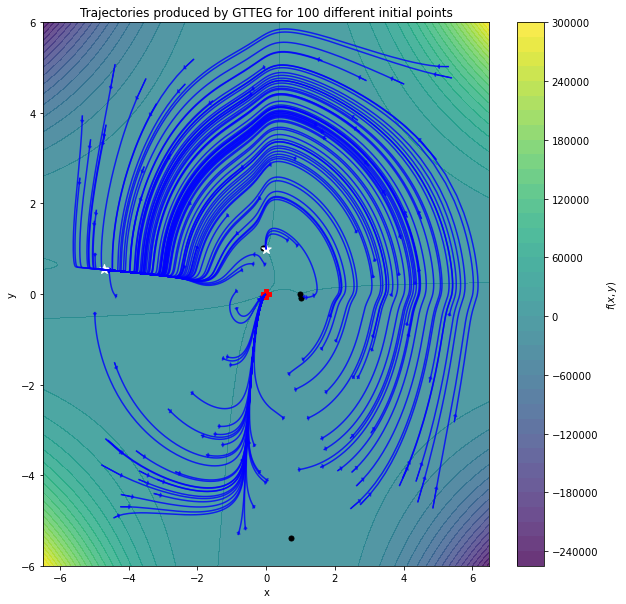

In [5]:
x_vals = np.linspace(-6.5, 6.5, 200)
y_vals = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)  # Compute function values on the grid

plt.figure(figsize=(10, 10))

# Plot the heatmap
heatmap = plt.contourf(X, Y, Z, cmap='viridis', alpha=0.8, levels=50)
colorbar = plt.colorbar(heatmap)
colorbar.set_label('$f(x, y)$', labelpad=7)

# for i in range(num_points**2):
for i in range(num_points):
    x_vals, y_vals = final_points[i, 0], final_points[i, 1]
    plt.plot(x_vals, y_vals, 'b-', alpha=0.8)  # Plot trajectory line

    for j in range(0,len(x_vals) - 1,80000):
        plt.arrow(x_vals[j], y_vals[j], 
                  x_vals[j + 1] - x_vals[j], y_vals[j + 1] - y_vals[j], 
                  head_width=0.1, head_length=0.05, fc='blue', ec='blue', alpha=0.6)

# Plot critical points
unstable = np.array([[1, 0], [1.01738, -0.0856417], [-0.0849318,1.00552],[0.728006,-5.39134]])
Nash_and_stable = np.array([[0, 1],[-4.73419, 0.559857]])
stable = np.array([[0, 0]])

plt.scatter(unstable[:, 0], unstable[:, 1], c='black', marker='.', label='Unstable Fixed Points', s=100)
plt.scatter(stable[:, 0], stable[:, 1], c='red', marker='P', label='Stable Fixed Points', s=100)
plt.scatter(Nash_and_stable[:, 0], Nash_and_stable[:, 1], c='white', marker='*', label='Local Nash and Stable Fixed Points', s=100)


plt.xlabel("x")
plt.ylabel("y")
# plt.legend()
plt.title("Trajectories produced by GTTEG for 100 different initial points")
# plt.grid('on')
plt.savefig('LCSS/convergence.pdf', format='pdf',bbox_inches='tight')

The below code is to generate the region of attractions for the second numerical example. The plot is included in the submitted paper.

In [247]:
def gradient_f(x, y):
    nabx =  x**2 * y**2 * (1.0*x +4*y) +2 * x * y**2 * (0.5*x**2+4*x*y+0.5 * y**2) +(-0.25*x + 0.6*y) * (x - 1)**2 * (y - 1)**2 +(2 * x - 2) * (y - 1)**2 * (-0.125 * x**2 + 0.6 * x * y - 0.5 * y**2)
    naby =  x**2 * y**2 * (4*x+1.0*y) +2 * x**2 * y * (0.5*x**2+4*x*y+0.5 * y**2) +(0.6*x-1.0*y) * (x - 1)**2 * (y - 1)**2 +(x - 1)**2 * (2 * y - 2) * (-0.125 * x**2 + 0.6 * x * y - 0.5 * y**2)
    return np.array([nabx, naby])



def G_tt_extra_gradient_descent_ascent2(lr1,gamma,tau, num_iterations, x_start, y_start,thresh):
    x, y = x_start, y_start
    x_history, y_history = [x], [y]
    critical_points = np.array([[0, 0], [0, 1], [1, 0], [1.01738, -0.0856417], [0.730749,-5.39852], [-0.0849318,1.00552],[-4.73419, 0.559857]])


    for i in range(num_iterations-1):
        grad = gradient_f(x, y)
        x_h = x - lr1/tau * grad[0]
        y_h = y + lr1 * grad[1]
        grad = gradient_f(x_h, y_h)
        x -= lr1/tau*gamma * grad[0]
        y += lr1*gamma * grad[1]
        x_history.append(x)
        y_history.append(y)
        if (i+1)%10000==0:
            distances = np.linalg.norm(critical_points - np.array((x,y)), axis=1)
            if np.min(distances)<=thresh and np.linalg.norm(grad)<=0.00001:
                # print(np.linalg.norm(grad))
                return np.array(x_history), np.array(y_history)
            if np.any(np.isnan(distances)):
                return np.array(x_history), np.array(y_history)

    print(np.linalg.norm(grad))
    return np.array(x_history), np.array(y_history)

In [248]:
num_grid = 100  
x_range = (-5, 3)
y_range = (-2, 2)
thresh = 1e-4 


x_vals = np.linspace(x_range[0], x_range[1], 2*num_grid)
y_vals = np.linspace(y_range[0], y_range[1], num_grid)
grid_x, grid_y = np.meshgrid(x_vals, y_vals)
start_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

num_iterations = 10000000
gamma = 0.5
tau = 1


critical_points = np.array([[0, 0], [0, 1], [1, 0], [1.01738, -0.0856417], [0.730749,-5.39852], [-0.0849318,1.00552],[-4.73419, 0.559857]])


colors = np.full((2*num_grid * num_grid,), -1)


for i, (x, y) in enumerate(start_points):
    if np.abs(x)<=2.8 and np.abs(y)<=2.8:
        lr1 = 0.001
    elif 2.8<=np.abs(x)<=5 and 2.8<=np.abs(y)<=5:
        lr1 = 0.0001
    else: 
        lr1 = 0.00005
    final_points = np.array(G_tt_extra_gradient_descent_ascent2(lr1, gamma, tau, num_iterations, x, y, thresh))
    # final_points = np.array(G_tt_extra_gradient_descent_ascent(lr1, gamma, tau, num_iterations, x, y))
    final_point = final_points[:, -1] if final_points.ndim > 1 else final_points
    distances = np.linalg.norm(critical_points - final_point, axis=1)
    closest_index = np.argmin(distances)
    colors[i] = closest_index if distances[closest_index] <= thresh else -1 

colors = colors.reshape(num_grid,2* num_grid)


In [ ]:
num_iterations = 1000000
lr1 = 0.0001
gamma = 0.5
tau = 1
final_points = np.array(G_tt_extra_gradient_descent_ascent2(lr1, gamma, tau, num_iterations, -5, -3,0.0001))
final_point = final_points[:, -1] if final_points.ndim > 1 else final_points
distances = np.linalg.norm(critical_points - final_point, axis=1)
closest_index = np.argmin(distances)
print(distances)
closest_index if distances[closest_index] <= thresh else -1 

[9.53250363e-05 9.99942812e-01 9.99923739e-01 1.02090704e+00
 5.44779940e+00 1.00904996e+00 4.76724794e+00]


0

In [ ]:
# np.save('colors1.npy',colors) #gamma = 0.5 tau = 1
# np.save('colors2.npy',colors) #gamma = 0.75 tau = 2
# np.save('colors3.npy',colors) #gamma = 5 tau = 0.5
# colors = np.load('colors1.npy')
# colors = np.load('colors2.npy')
# colors = np.load('colors3.npy')

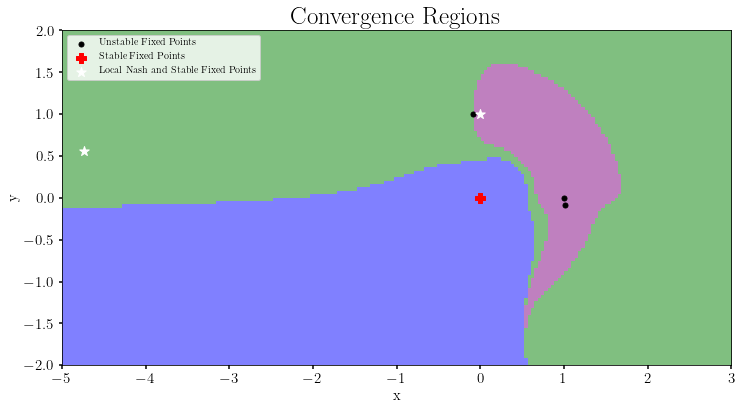

In [254]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

color_list = ["blue","purple","red","cyan","yellow","brown","green"]
# color_list = ["gray","blue","purple","red","cyan","yellow","brown","green"]
cmap = mcolors.ListedColormap(color_list)
critical_labels = ["infty","(0,0)", "(0,1)", "(1,0)", "(1.02,-0.09)", "(0.73,-5.39)" , "(-0.09, 1.01)","(-4.58,0.53)"]

unstable = np.array([[1, 0], [1.01738, -0.0856417], [-0.0849318,1.00552]])
Nash_and_stable = np.array([[0, 1],[-4.73419, 0.559857]])
stable = np.array([[0, 0]])

plt.figure(figsize=(12, 12))
plt.imshow(colors, origin='lower', extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap=cmap, alpha=0.5)
# cbar = plt.colorbar(label="Critical Point Index", ticks=range(len(critical_points)))
# cbar.ax.set_yticklabels(critical_labels)

plt.scatter(unstable[:, 0], unstable[:, 1], c='black', marker='.', label='Unstable Fixed Points', s=100)
plt.scatter(stable[:, 0], stable[:, 1], c='red', marker='P', label='Stable Fixed Points', s=100)
plt.scatter(Nash_and_stable[:, 0], Nash_and_stable[:, 1], c='white', marker='*', label='Local Nash and Stable Fixed Points', s=100)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Convergence Regions")
plt.legend(loc=2)


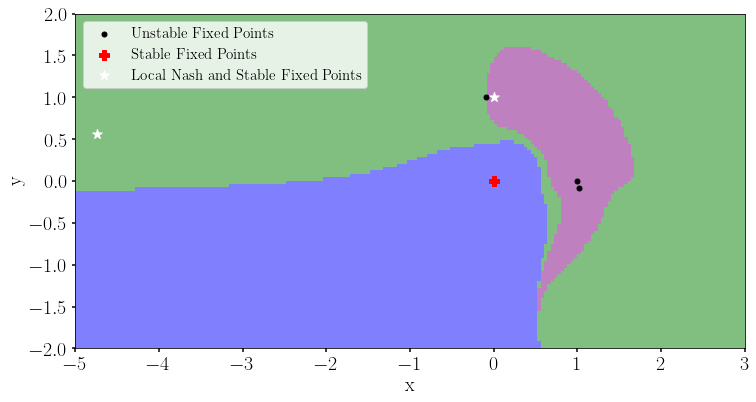

In [261]:
import matplotlib
matplotlib.use('PDF')  # Set the backend to PDF
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# color_list = ["gray","blue","purple","red","cyan","yellow","brown","green"]
color_list = ["blue","purple","red","cyan","yellow","brown","green"]
cmap = mcolors.ListedColormap(color_list)
critical_labels = ["(0,0)", "(0,1)", "(1,0)", "(1.02,-0.09)", "(0.73,-5.39)" , "(-0.09, 1.01)","(-4.58,0.53)"]

unstable = np.array([[1, 0], [1.01738, -0.0856417], [-0.0849318,1.00552]])
Nash_and_stable = np.array([[0, 1],[-4.73419, 0.559857]])
stable = np.array([[0, 0]])

plt.figure(figsize=(12, 12))
plt.imshow(colors, origin='lower', extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap=cmap, rasterized=True, alpha=0.5)
# cbar = plt.colorbar(label="Critical Point Index", ticks=range(len(critical_points)))
# cbar.ax.set_yticklabels(critical_labels)

plt.scatter(unstable[:, 0], unstable[:, 1], c='black', marker='.', label='Unstable Fixed Points', s=100,rasterized=True)
plt.scatter(stable[:, 0], stable[:, 1], c='red', marker='P', label='Stable Fixed Points', s=100,rasterized=True)
plt.scatter(Nash_and_stable[:, 0], Nash_and_stable[:, 1], c='white', marker='*', label='Local Nash and Stable Fixed Points', s=100,rasterized=True)

plt.xlabel("x")
plt.ylabel("y")
# plt.title("Regions of Attraction")
plt.legend(loc=2,fontsize=15)

plt.rcParams['text.usetex'] = True  
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['axes.unicode_minus'] = True  # Ensure minus signs are properly displayed
plt.rcParams['pdf.fonttype'] = 42  # Use Type 42 fonts to embed correctly


plt.rcParams['axes.labelweight'] = 'bold'  # Make axis labels bold
# plt.rcParams['axes.titlesize'] = 25  # Increase title size
plt.rcParams['axes.labelsize'] = 20 # Increase axis label size
plt.rcParams['xtick.labelsize'] = 20  # Increase x-axis tick label size
plt.rcParams['ytick.labelsize'] = 20  # Increase y-axis tick label size
plt.rcParams['font.weight'] = 'bold'  # Make all text bold

plt.savefig('LCSS/grid1.pdf', format='pdf', bbox_inches='tight', dpi=300, transparent=False)
# plt.savefig('LCSS/grid2.pdf', format='pdf', bbox_inches='tight', dpi=300, transparent=False)
# plt.savefig('LCSS/grid3.pdf', format='pdf', bbox_inches='tight', dpi=300, transparent=False)

The below code is related to first numerical example. We check the trajectories and convergence properties of GDA and the mentioned three variants of extragradient algorithm.

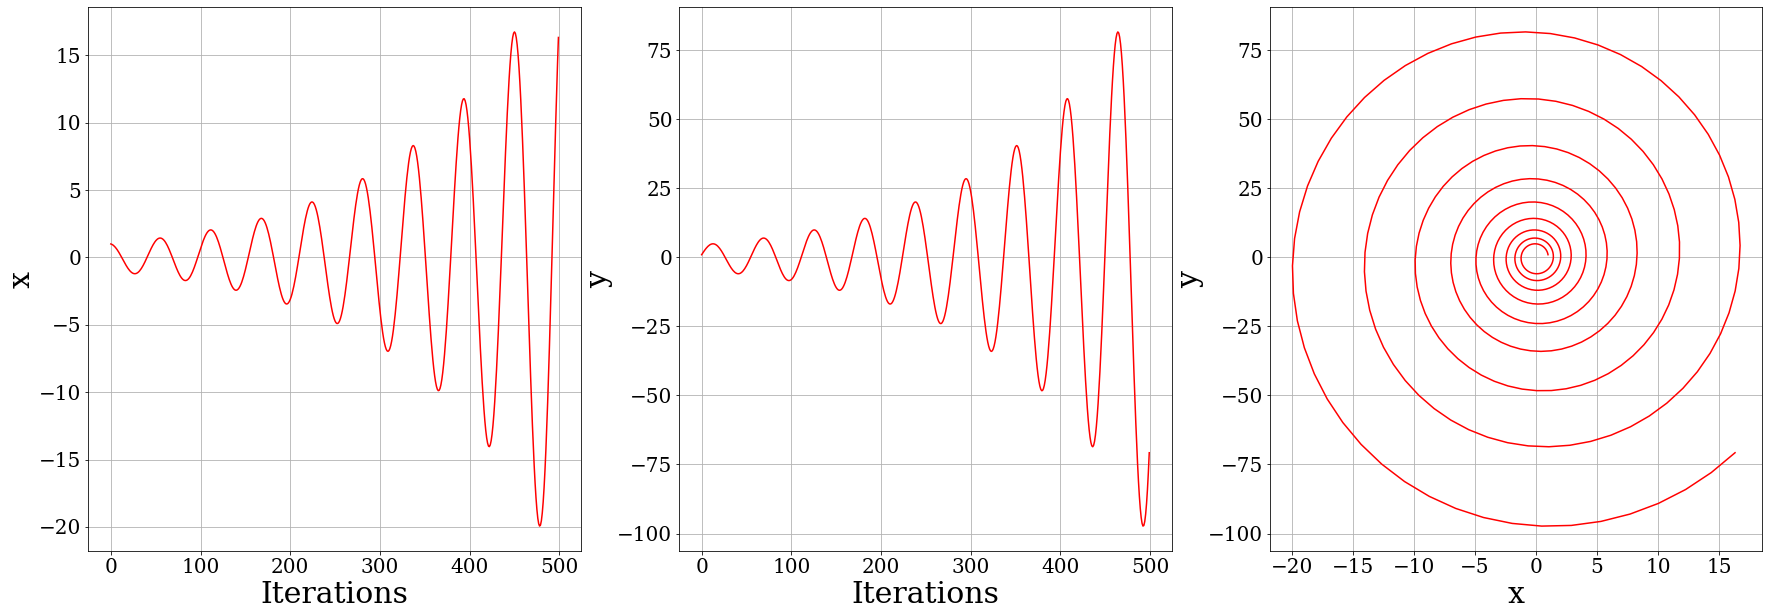

In [18]:
def f(x, y):
    return x * y

def gradient_f(x, y):
    return np.array([y, x])

def gradient_descent_ascent(learning_rate,tau, num_iterations, x_start, y_start):
    x, y = x_start, y_start
    x_history, y_history = [x], [y]
    
    for _ in range(num_iterations-1):
        grad = gradient_f(x, y)
        x -= learning_rate/tau * grad[0]
        y += learning_rate * grad[1]
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)

# Set parameters
learning_rate = 0.5
num_iterations = 500
x_start, y_start = 1.0, 1.0
tau = 20
# Run gradient descent-ascent
x_history0, y_history0 = gradient_descent_ascent(learning_rate,tau, num_iterations, x_start, y_start)

# Plotting
plt.figure(figsize=(30, 10))
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.subplot(1,3,1)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=20, color='black')
plt.plot(np.array(range(num_iterations)),x_history0, 'red')
plt.xlabel('Iterations', fontdict=font)
plt.ylabel('x', fontdict=font)
plt.grid(True)
plt.subplot(1,3,2)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=20, color='black')
plt.plot(np.array(range(num_iterations)),y_history0, 'red')
plt.xlabel('Iterations', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.grid(True)
plt.subplot(1,3,3)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=20, color='black')
plt.plot(x_history0,y_history0, 'red')
plt.xlabel('x', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.grid(True)
plt.savefig('LCSS/GDA_xy.pdf', format='pdf',bbox_inches='tight')

In [23]:
def f(x, y):
    return x * y

def gradient_f(x, y):
    return np.array([y, x])

def G_extra_gradient_descent_ascent(lr1,gamma, num_iterations, x_start, y_start):
    x, y = x_start, y_start
    x_history, y_history = [x], [y]
    
    for _ in range(num_iterations-1):
        grad = gradient_f(x, y)
        x_h = x - lr1 * grad[0]
        y_h = y + lr1 * grad[1]
        grad = gradient_f(x_h, y_h)
        x -= lr1*gamma * grad[0]
        y += lr1*gamma * grad[1]
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)


def tt_extra_gradient_descent_ascent(lr1,tau, num_iterations, x_start, y_start):
    x, y = x_start, y_start
    x_history, y_history = [x], [y]
    
    for _ in range(num_iterations-1):
        grad = gradient_f(x, y)
        x_h = x - lr1/tau * grad[0]
        y_h = y + lr1 * grad[1]
        grad = gradient_f(x_h, y_h)
        x -= lr1/tau * grad[0]
        y += lr1 * grad[1]
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)

def G_tt_extra_gradient_descent_ascent(lr1,gamma,tau, num_iterations, x_start, y_start):
    x, y = x_start, y_start
    x_history, y_history = [x], [y]
    
    for _ in range(num_iterations-1):
        grad = gradient_f(x, y)
        x_h = x - lr1/tau * grad[0]
        y_h = y + lr1 * grad[1]
        grad = gradient_f(x_h, y_h)
        x -= lr1/tau*gamma * grad[0]
        y += lr1*gamma * grad[1]
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)

# Set parameters
lr1 = 0.5

gamma = 0.25
tau = 0.2
## for lr1 = 0.9 and tau =0.1 gamma can compensate but for lr1 = 0.9 and gamma =2 tau can not do anything 
# actually gamma is important as you can not do anything when it is over the limit. but when you have tau=0.01 for example you can find a gamma to make the algorithm converge.

num_iterations = 500
x_start, y_start = 1, 1

# Run gradient descent-ascent
x_history, y_history = G_extra_gradient_descent_ascent(lr1,gamma, num_iterations, x_start, y_start)
x_history2, y_history2 = tt_extra_gradient_descent_ascent(lr1,tau, num_iterations, x_start, y_start)
x_history3, y_history3 = G_tt_extra_gradient_descent_ascent(lr1,gamma,tau, num_iterations, x_start, y_start)


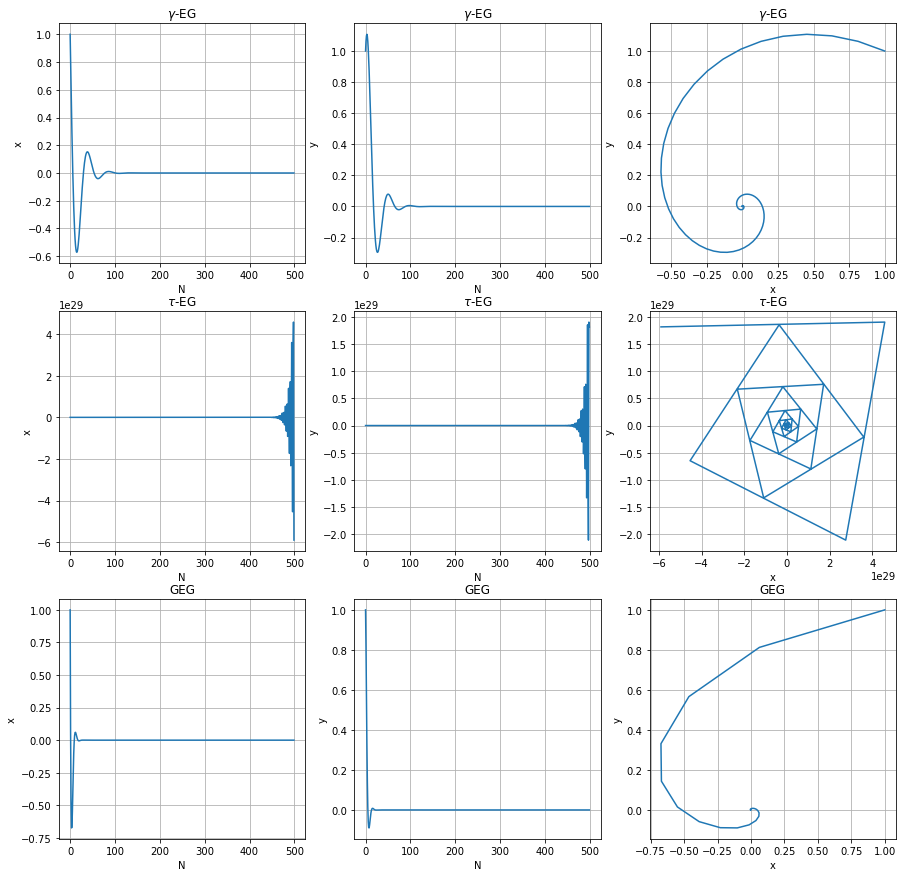

In [24]:
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
plt.plot(np.array(range(num_iterations)),x_history)
plt.xlabel('N')
plt.ylabel('x')
plt.title(R'$\gamma$-EG')
plt.grid(True)
plt.subplot(3,3,2)
plt.plot(np.array(range(num_iterations)),y_history)
plt.xlabel('N')
plt.ylabel('y')
plt.title(R'$\gamma$-EG')
plt.grid(True)
plt.subplot(3,3,3)
plt.plot(x_history,y_history)
plt.xlabel('x')
plt.ylabel('y')
plt.title(R'$\gamma$-EG')
plt.grid(True)
plt.subplot(3,3,4)
plt.plot(np.array(range(num_iterations)),x_history2)
plt.xlabel('N')
plt.ylabel('x')
plt.title(R'$\tau$-EG')
plt.grid(True)
plt.subplot(3,3,5)
plt.plot(np.array(range(num_iterations)),y_history2)
plt.xlabel('N')
plt.ylabel('y')
plt.title(R'$\tau$-EG')
plt.grid(True)
plt.subplot(3,3,6)
plt.plot(x_history2,y_history2)
plt.xlabel('x')
plt.ylabel('y')
plt.title(R'$\tau$-EG')
plt.grid(True)
plt.subplot(3,3,7)
plt.plot(np.array(range(num_iterations)),x_history3)
plt.xlabel('N')
plt.ylabel('x')
plt.title('GEG')
plt.grid(True)
plt.subplot(3,3,8)
plt.plot(np.array(range(num_iterations)),y_history3)
plt.xlabel('N')
plt.ylabel('y')
plt.title('GEG')
plt.grid(True)
plt.subplot(3,3,9)
plt.plot(x_history3,y_history3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('GEG')
plt.grid(True)

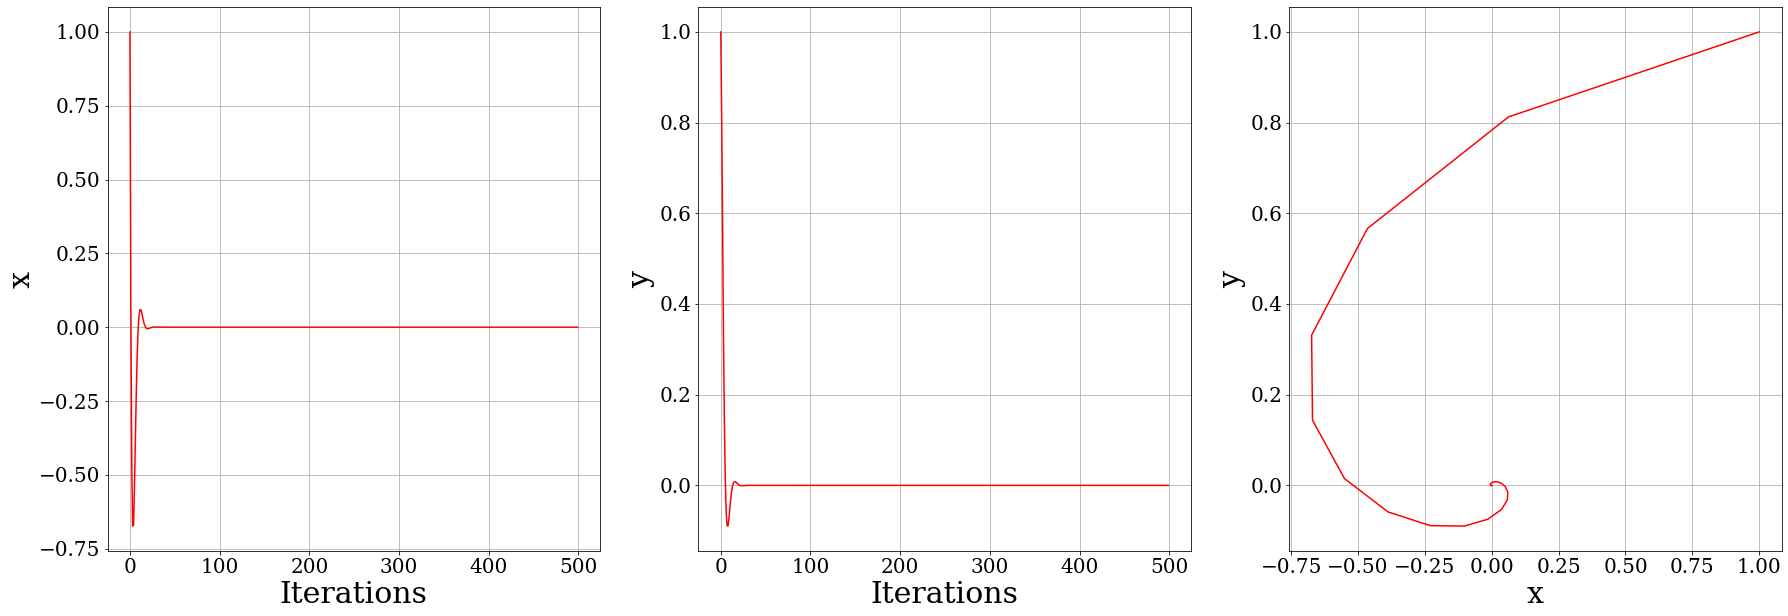

In [25]:
plt.figure(figsize=(30, 10))
font = {'family': 'serif', 'weight': 'normal', 'size': 30}
font1 = {'family': 'serif', 'size': 20}
plt.subplot(1,3,1)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=20, color='black')
plt.plot(np.array(range(num_iterations)),x_history3, 'red')
plt.xlabel('Iterations', fontdict=font)
plt.ylabel('x', fontdict=font)
plt.grid(True)
plt.subplot(1,3,2)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=20, color='black')
plt.plot(np.array(range(num_iterations)),y_history3, 'red')
plt.xlabel('Iterations', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.grid(True)
plt.subplot(1,3,3)
plt.xticks(fontname='serif', fontsize=20, color='black')
plt.yticks(fontname='serif', fontsize=20, color='black')
plt.plot(x_history3,y_history3, 'red')
plt.xlabel('x', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.grid(True)
plt.savefig('LCSS/GEG_xy.pdf', format='pdf',bbox_inches='tight')

The below code is to check the norm of eigenvalues of three algorithms for different parameters of the first numerical example.

In [23]:
eta = 0.9
tau = 0.01
gamma = 0.001

GEG_norm = ((1-gamma*eta**2/tau)**2+(gamma*eta/(tau)**(1/2))**2)**(1/2)
tEG_norm = ((1-eta**2/tau)**2+(eta/(tau)**(1/2))**2)**(1/2)
EGp_norm = ((1-gamma*eta**2)**2+(gamma*eta)**2)**(1/2
)
print("norm of the eigenvalues of GEG:", GEG_norm)
print("norm of the eigenvalues of tau EG:", tEG_norm)
print("norm of the eigenvalues of EG+:", EGp_norm)

norm of the eigenvalues of GEG: 0.919044068584309
norm of the eigenvalues of tau EG: 80.50465825031493
norm of the eigenvalues of EG+: 0.9991904053282338


The below code is just to ensure the correctness of the results of mathematica code used in the proof of theorem4 for finding a feasible nonzero $\gamma$

In [46]:
def A(x, y):
    return x + x**2 - y**2

def B(x, y):
    return y + 2*x*y

def gamma_case(x, y):
    A_val = A(x, y)
    B_val = B(x, y)
    denominator = A_val**2 + B_val**2
    if denominator != 0:
        return -2 * A_val / denominator
    else:
        return None  

c = 1

x_vals = np.linspace(-0.99999999999, 0, 100)  # Avoid exact -1  to stay within bounds

valid_gamma_points = []
valid_gamma_values = []

for x in x_vals:
    y_min, y_max = -np.sqrt(1 - x**2), np.sqrt(1 - x**2)
    y_vals = np.linspace(y_min+0.00000000001, y_max-0.00000000001, 50) # to stay within bounds

    for y in y_vals:
        if x == 0 and y == 0:
            continue  

        gamma_val = gamma_case(x, y)
        if gamma_val is not None:
            valid_gamma_points.append((x, y))
            valid_gamma_values.append(gamma_val)
        if gamma_val==1:
            print(x,y)

print(np.min(valid_gamma_values), np.max(valid_gamma_values))


1.00000000001 2403.0107088337463
